In [92]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from PIL import Image

def readTrafficSigns(rootpath):
    images = []
    labels = []
    Roi_X1 = []
    Roi_Y1 = []
    Roi_X2 = []
    Roi_Y2 = []

    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader)
        for row in gtReader:
            images.append(plt.imread(prefix + row[0]))
            Roi_X1.append(int(row[3]))
            Roi_Y1.append(int(row[4]))
            Roi_X2.append(int(row[5]))
            Roi_Y2.append(int(row[6]))
            labels.append(row[7])
        gtFile.close()
    return images, labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2
images,labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2 = readTrafficSigns('C:/Users/Pradeep/PycharmProjects/IcvTask1/GTSRB/Final_Training/Images/')  

In [93]:
print(len(images))

39209


In [94]:
filtered_images = []
for im in range(len(images)):
    filtered_images.append(images[im][Roi_X1[im]:Roi_X2[im]+1,Roi_Y1[im]:Roi_Y2[im]+1]) 

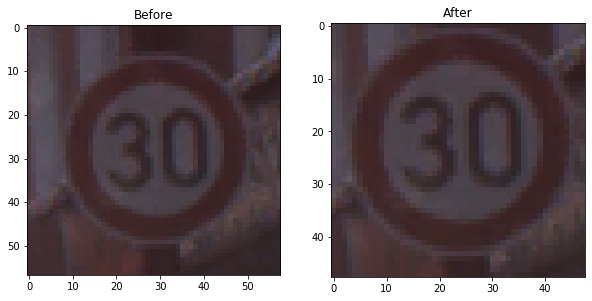

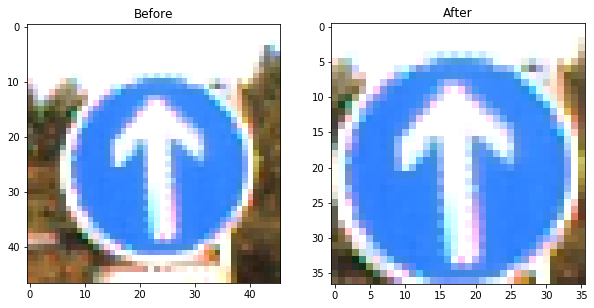

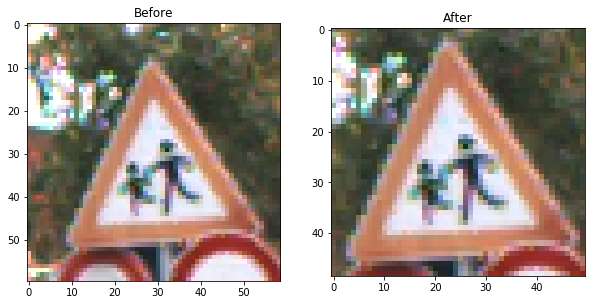

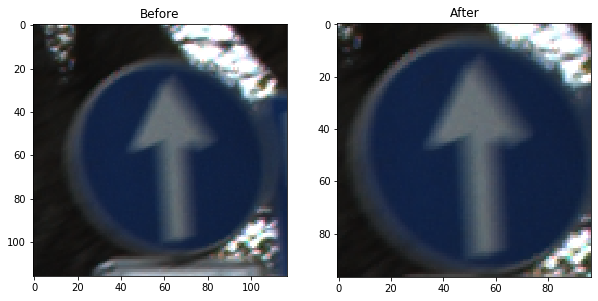

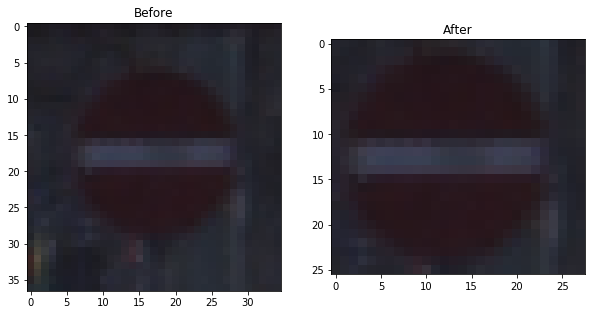

In [95]:
import numpy as np
index_val = list(set(np.random.randint(0, len(filtered_images), 5)))

for row in range(len(index_val)):
    fig = plt.figure(figsize = (10, 30))
    plt_list = {'Before':images[index_val[row]], 'After':filtered_images[index_val[row]]}
    
    for count, cols in enumerate(plt_list.keys()):
        fig.add_subplot(len(index_val), len(plt_list), count + 1)
        plt.title(cols)
        plt.imshow(plt_list[cols])
        
    plt_list = {}
    plt.show()

In [96]:
from skimage.transform import resize
image_resized = []
for im in filtered_images:
    image_resized.append(resize(im, (32,32),
                       anti_aliasing=False))


In [154]:
from skimage.color import rgb2yuv
from skimage import color
yuv_images = []
for im in image_resized:
    yuv_images.append(color.rgb2grey(im)) #yuv_images.append(rgb2yuv(im)) #rgb2grey is luminance

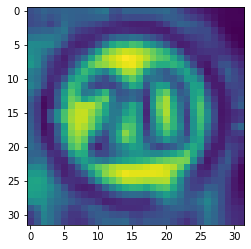

In [155]:
plt.imshow(yuv_images[5])

In [156]:
yuv_images_array = np.array(yuv_images, dtype='float')

labels_array = np.array(labels, dtype='int')  

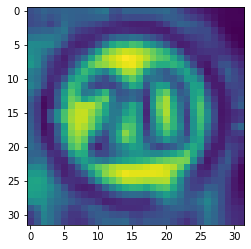

In [157]:
grayed_images = yuv_images_array #color.rgb2gray(yuv_images_array) #yuv_images_array
plt.imshow(grayed_images[5]) #cmap=plt.cm.gray

In [158]:
grayed_unrolled_images = []
from skimage import color
from sklearn import svm
for i in grayed_images:
    grayed_unrolled_images.append(np.ravel(i))
print('this is loop')
grayed_un_images = np.array(grayed_unrolled_images)
clf = svm.SVC(gamma='scale', verbose = 100)
clf.fit(grayed_un_images, labels_array)

this is loop
[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=100)

In [148]:
clf.get_params()
from joblib import dump, load
dump(clf, 'luminance_32x32.joblib') #Dumped at June 2 at 08:26 AM



['yuv_32x32.joblib']

In [149]:
tmp = grayed_un_images[300:500]
#clf.score(tmp,labels_array[300:500])
clf2 = load('yuv_32x32.joblib')
clf2.score(tmp,labels_array[300:500])

0.95

In [136]:
clf.predict(grayed_un_images[250].reshape(1,3072))

array([1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 2.54254532e-01 -4.41178025e-03 -3.30070842e-03]
 [ 2.51852539e-01 -1.31757953e-02  5.23697157e-03]
 [ 2.46540198e-01 -1.74422679e-02  6.64185568e-03]
 [ 2.41601492e-01 -1.44050297e-02  8.38921514e-03]
 [ 2.38183931e-01 -1.43976920e-02  1.14025018e-02]
 [ 2.30844895e-01 -2.35910971e-02  1.91360746e-02]
 [ 2.33702137e-01 -2.93072947e-02  2.87898731e-02]
 [ 2.53244225e-01 -2.58939342e-02  3.47068634e-02]
 [ 2.86467858e-01 -2.10341778e-02  3.63166434e-02]
 [ 3.39310390e-01 -1.84376327e-02  4.90608252e-02]
 [ 4.26270879e-01 -2.87156194e-02  7.46343939e-02]
 [ 5.24723591e-01 -4.31262850e-02  8.74399572e-02]
 [ 5.63553081e-01 -4.65499855e-02  9.24756110e-02]
 [ 5.86629228e-01 -4.98115844e-02  1.05767754e-01]
 [ 5.79035162e-01 -5.04175592e-02  1.20469644e-01]
 [ 5.65426367e-01 -4.98097167e-02  1.25962837e-01]
 [ 5.73234840e-01 -4.79231187e-02  1.32331308e-01]
 [ 5.78163036e-01 -4.35891618e-02  1.29163620e-01]
 [ 5.94129350e-01 -3.70931232e-02  1.23077120e-01]
 [ 6.02764267e-01 -3.35015148e-

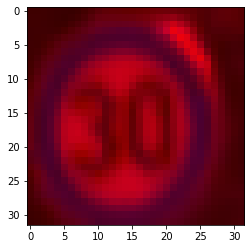

In [150]:
plt.imshow(grayed_un_images[853].reshape(32,32,3))
print(grayed_un_images[50].reshape(32,32,3)[0])

In [151]:
test_size = 100
ran = list(set(np.random.randint(0, len(filtered_images), test_size)))

predicted_labels = []
original_labels = []
for test in ran:
    predicted_labels.append((clf.predict(grayed_un_images[test].reshape(1,3072)))[0]) 
    original_labels.append(labels[test])

In [152]:
original_labels_mod = []
predicted_labels_mod = []
for pred,orig in zip(predicted_labels,original_labels):
    if(int(pred) < 9):
        predicted_labels_mod.append('speed-sign')
    elif(pred == 11):
        predicted_labels_mod.append('main-sign')
    elif(pred == 12):
        predicted_labels_mod.append('nolimits-sign')
    elif(pred == 13):
        predicted_labels_mod.append('warning-sign')
    else:
        predicted_labels_mod.append('other-sign')
    
    if(int(orig) < 9):
        original_labels_mod.append('speed-sign')
    elif(orig == 11):
        original_labels_mod.append('main-sign')
    elif(orig == 12):
        original_labels_mod.append('nolimits-sign')
    elif(orig == 13):
        original_labels_mod.append('warning-sign')
    else:
        original_labels_mod.append('other-sign')

In [153]:
error=0
for pred,orig in zip(predicted_labels_mod,original_labels_mod):
    if(pred != orig):
        error+=1
print('accuracy ='+str((test_size-error)/test_size))

accuracy =0.81
